In [1]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
#!pip install imblearn

In [1]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

In [5]:
# Load dataset
dataset = pd.read_csv('dataa.csv', sep=';' )
class_counts = dataset['KELAS'].value_counts()
print(class_counts)

# menghapus nilai kosong
dataset.dropna(inplace=True)

# memisahkan data menjadi fitur (X) dan label (y)
X = dataset[['IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPS6']]  # Adjust 'target_column' to the name of your target column
y = dataset['KELAS']  # Adjust 'target_column' to the name of your target column

# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

#oversampling (SMOTE)
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

y_over.head(495)

NameError: name 'pd' is not defined

In [5]:
# menemukan K terbaik menggunakan kfold cv
# menentukan rentang nilai K
k_values = [3, 5, 7, 11, 13, 15]

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Daftar inisialisasi untuk menyimpan skor rata-rata untuk setiap metrik
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# # Perform cross-validation for each K value and scoring metric
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=10, scoring=scoring)
    accuracy_scores.append(scores['test_accuracy'].mean())
    precision_scores.append(scores['test_precision'].mean())
    recall_scores.append(scores['test_recall'].mean())
    f1_scores.append(scores['test_f1_score'].mean())

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=10, scoring=scoring)
    print(f"K = {k}:")
    print("  Accuracy:", scores['test_accuracy'].mean())
    print("  Precision:", scores['test_precision'].mean())
    print("  Recall:", scores['test_recall'].mean())
    print("  F1 Score:", scores['test_f1_score'].mean())
    print()
    
# Plotting the bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

%matplotlib inline
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(k_values)) + i*0.1, scores[i], width=0.1, label=metric)

plt.xticks(np.arange(len(k_values)), k_values)
plt.xlabel('K Values')
plt.ylabel('Scores')
plt.title('Cross-Validation Scores for Different K Values')
plt.legend()
# plt.savefig('crossval_scores.png', dpi=300, bbox_inches='tight')
plt.show()


# Perform cross-validation on KNN
k_nn = KNeighborsClassifier(n_neighbors=13)
knn_scores = cross_val_score(k_nn, X_train, y_train, cv=10)  # cv=10 untuk 10-fold cross-validation
# knn = OneVsRestClassifier(knn)
knn_avg_score = np.mean(knn_scores)
print("KNN Cross-Validation Average Score:", knn_avg_score)


# # Perform cross-validation on KNN
# k_nn = KNeighborsClassifier(n_neighbors=13)
# k_nn = k_nn.fit(X_over, y_over)  # cv=10 untuk 10-fold cross-validation
# knn_pred = k_nn.predict(X_test)
# knn_score = accuracy_score(y_test, knn_pred)

# print(accuracy_score(y_test, knn_pred))
# print(classification_report(y_test, knn_pred))
# print(confusion_matrix(y_test, knn_pred))

# # model plot
# model_name = "KNN"
# plot_result(model_name, "Accuracy", "Accuracy scores in 5 Folds", knn_scores["Training Accuracy scores"], 
#             knn_scores["Validation Accuracy scores"])



# plt.bar(models, scores)
# plt.xlabel('Models')
# plt.ylabel('Cross-Validation Average Score')
# plt.title('Cross-Validation Score Comparison')
# plt.show()


NameError: name 'X_train' is not defined

C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

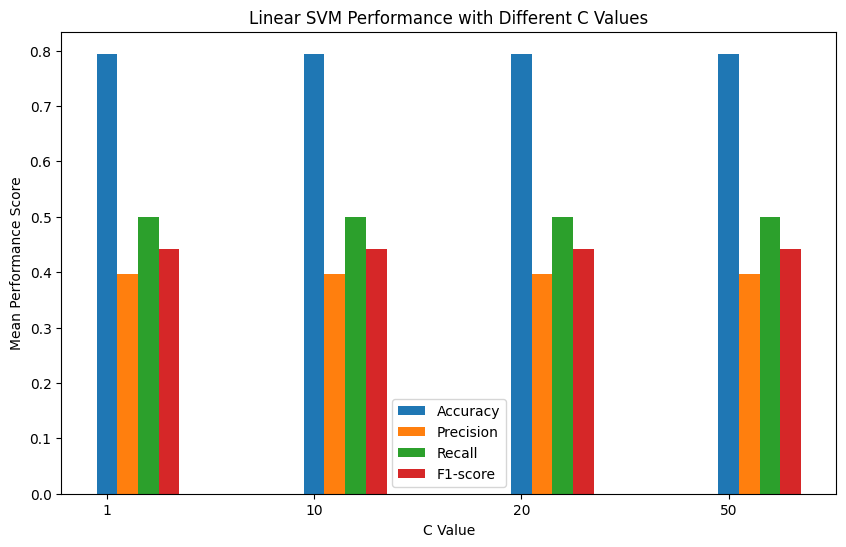

Mean Performance Scores:
C Value: 1
Accuracy: 0.7943333333333334
Precision: 0.3971666666666667
Recall: 0.5
F1-score: 0.4426650223161851
--------------------------------------------------
C Value: 10
Accuracy: 0.7943333333333334
Precision: 0.3971666666666667
Recall: 0.5
F1-score: 0.4426650223161851
--------------------------------------------------
C Value: 20
Accuracy: 0.7943333333333334
Precision: 0.3971666666666667
Recall: 0.5
F1-score: 0.4426650223161851
--------------------------------------------------
C Value: 50
Accuracy: 0.7943333333333334
Precision: 0.3971666666666667
Recall: 0.5
F1-score: 0.4426650223161851
--------------------------------------------------
0.47058823529411764
              precision    recall  f1-score   support

           0       0.21      0.57      0.30        76
           1       0.80      0.45      0.57       298

    accuracy                           0.47       374
   macro avg       0.50      0.51      0.44       374
weighted avg       0.68      0.4

In [7]:
# # Find best kernel and parameter
# # Define the parameter grid for tuning
C_values = [1, 10, 20, 50]

# Initialize dictionaries to store the mean performance scores for each metric and C value
mean_accuracy = {}
mean_precision = {}
mean_recall = {}
mean_f1_score = {}

# Perform k-fold cross-validation for each C value
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(svm, X_train, y_train, cv=10, scoring=scoring)
    
    mean_accuracy[C] = np.mean(scores['test_accuracy'])
    mean_precision[C] = np.mean(scores['test_precision_macro'])
    mean_recall[C] = np.mean(scores['test_recall_macro'])
    mean_f1_score[C] = np.mean(scores['test_f1_macro'])

# Plot the mean performance scores for each metric as a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [mean_accuracy, mean_precision, mean_recall, mean_f1_score]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(C_values)) + (i * 0.1), [metric_scores[i][C] for C in C_values], width=0.1, label=metric)

plt.xlabel('C Value')
plt.ylabel('Mean Performance Score')
plt.title('Linear SVM Performance with Different C Values')
plt.xticks(np.arange(len(C_values)), C_values)
plt.legend()
plt.show()
print("Mean Performance Scores:")
for C in C_values:
    print(f"C Value: {C}")
    print(f"Accuracy: {mean_accuracy[C]}")
    print(f"Precision: {mean_precision[C]}")
    print(f"Recall: {mean_recall[C]}")
    print(f"F1-score: {mean_f1_score[C]}")
    print("-" * 50)
    
# # plt.savefig('crossvalsvm_scores.png', dpi=300, bbox_inches='tight')


svmB = SVC(kernel='linear', C=1,)
svmB = svmB.fit(X_over, y_over)
svm_pred = svmB.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)

print(accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))

# # Perform cross-validation on SVM
# svm = SVC(kernel='linear', C=1, probability=True)
# svm_scores = cross_val_score(svm, X_train, y_train, cv=10)  # cv=10 untuk 10-fold cross-validation
# # svm1 = OneVsRestClassifier(svm)
# svm_avg_score = np.mean(svm_scores)

# print("SVM Cross-Validation Average Score:", svm_avg_score)
# print(accuracy_score(y_test, svm_avg_score))
# print(classification_report(y_test, svm_avg_score))
# print(confusion_matrix(y_test, svm_avg_score))


C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

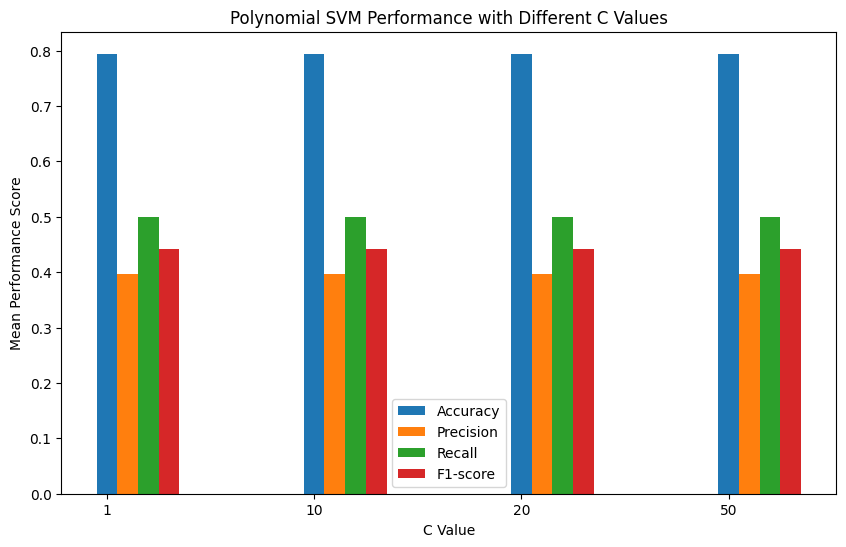

Mean Performance Scores:
C Value: 1
Accuracy: 0.7943333333333334
Precision: 0.3971666666666667
Recall: 0.5
F1-score: 0.4426650223161851
--------------------------------------------------
C Value: 10
Accuracy: 0.7943333333333334
Precision: 0.3971666666666667
Recall: 0.5
F1-score: 0.4426650223161851
--------------------------------------------------
C Value: 20
Accuracy: 0.7943333333333334
Precision: 0.3971666666666667
Recall: 0.5
F1-score: 0.4426650223161851
--------------------------------------------------
C Value: 50
Accuracy: 0.7943333333333334
Precision: 0.3971666666666667
Recall: 0.5
F1-score: 0.4426650223161851
--------------------------------------------------


In [8]:
C_values = [1, 10, 20, 50]

# Initialize dictionaries to store the mean performance scores for each metric and C value
mean_accuracy = {}
mean_precision = {}
mean_recall = {}
mean_f1_score = {}

# Perform k-fold cross-validation for each C value
for C in C_values: 
    svm = SVC(kernel='poly', degree=3, C=C)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(svm, X_train, y_train, cv=10, scoring=scoring)
    
    mean_accuracy[C] = np.mean(scores['test_accuracy'])
    mean_precision[C] = np.mean(scores['test_precision_macro'])
    mean_recall[C] = np.mean(scores['test_recall_macro'])
    mean_f1_score[C] = np.mean(scores['test_f1_macro'])

# Plot the mean performance scores for each metric as a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [mean_accuracy, mean_precision, mean_recall, mean_f1_score]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(C_values)) + (i * 0.1), [metric_scores[i][C] for C in C_values], width=0.1, label=metric)

plt.xlabel('C Value')
plt.ylabel('Mean Performance Score')
plt.title('Polynomial SVM Performance with Different C Values')
plt.xticks(np.arange(len(C_values)), C_values)
plt.legend()
plt.show()

print("Mean Performance Scores:")
for C in C_values:
    print(f"C Value: {C}")
    print(f"Accuracy: {mean_accuracy[C]}")
    print(f"Precision: {mean_precision[C]}")
    print(f"Recall: {mean_recall[C]}")
    print(f"F1-score: {mean_f1_score[C]}")
    print("-" * 50)

In [4]:
# Define the gamma values to evaluate
gamma_values = [1, 10, 20, 30]

# Initialize dictionaries to store the mean performance scores for each metric and gamma value
mean_accuracy = {}
mean_precision = {}
mean_recall = {}
mean_f1_score = {}

# Perform k-fold cross-validation for each gamma value
for gamma in gamma_values:
    svm = SVC(kernel='rbf', gamma=gamma)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(svm, X_train, y_train, cv=10, scoring=scoring)
    
    mean_accuracy[gamma] = np.mean(scores['test_accuracy'])
    mean_precision[gamma] = np.mean(scores['test_precision_macro'])
    mean_recall[gamma] = np.mean(scores['test_recall_macro'])
    mean_f1_score[gamma] = np.mean(scores['test_f1_macro'])

# Plotting the mean performance scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
mean_scores = [mean_accuracy, mean_precision, mean_recall, mean_f1_score]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    scores = [mean_scores[i][gamma] for gamma in gamma_values]
    plt.bar(np.arange(len(gamma_values)) + i * 0.15, scores, width=0.15, label=metric)

plt.xlabel('Gamma Value')
plt.ylabel('Mean Performance Score')
plt.title('Mean Performance Scores for Different Gamma Values')
plt.xticks(np.arange(len(gamma_values)), gamma_values)
plt.legend()
plt.grid(True)
plt.show()

# Print the mean performance scores for each metric and gamma value
print("Mean Performance Scores:")
for gamma in gamma_values:
    print(f"Gamma Value: {gamma}")
    print(f"Accuracy: {mean_accuracy[gamma]}")
    print(f"Precision: {mean_precision[gamma]}")
    print(f"Recall: {mean_recall[gamma]}")
    print(f"F1-score: {mean_f1_score[gamma]}")
    print("-" * 50)

NameError: name 'X_train' is not defined

C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

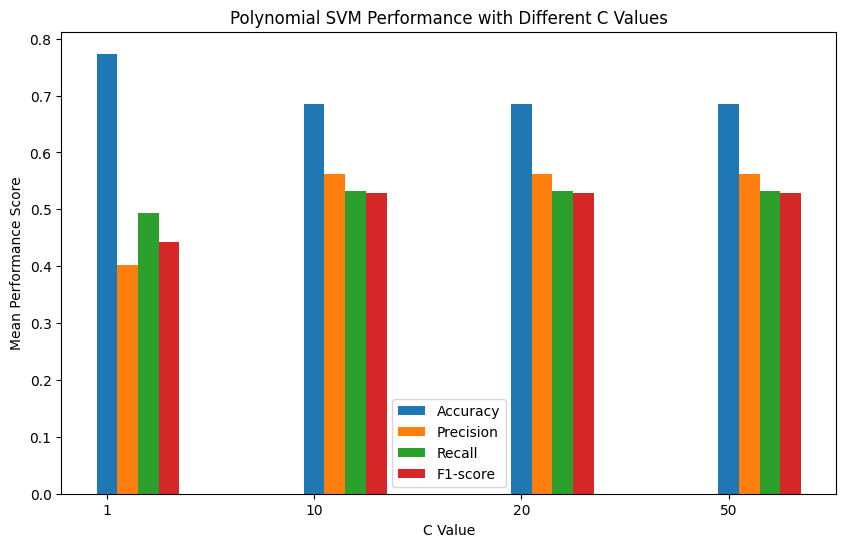

Mean Performance Scores:
C Value: 1
Accuracy: 0.7735000000000001
Precision: 0.40296148459383757
Recall: 0.49421052631578954
F1-score: 0.44292342024900166
--------------------------------------------------
C Value: 10
Accuracy: 0.6846666666666666
Precision: 0.5625099820630006
Recall: 0.5319298245614036
F1-score: 0.5292835369536268
--------------------------------------------------
C Value: 20
Accuracy: 0.6846666666666666
Precision: 0.5625099820630006
Recall: 0.5319298245614036
F1-score: 0.5292835369536268
--------------------------------------------------
C Value: 50
Accuracy: 0.6846666666666666
Precision: 0.5625099820630006
Recall: 0.5319298245614036
F1-score: 0.5292835369536268
--------------------------------------------------


In [10]:
C_values = [1, 10, 20, 50]

# Initialize dictionaries to store the mean performance scores for each metric and C value
mean_accuracy = {}
mean_precision = {}
mean_recall = {}
mean_f1_score = {}

# Perform k-fold cross-validation for each C value
for C in C_values:
    svm = SVC(kernel='sigmoid', degree=3, C=C)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(svm, X_train, y_train, cv=10, scoring=scoring)
    
    mean_accuracy[C] = np.mean(scores['test_accuracy'])
    mean_precision[C] = np.mean(scores['test_precision_macro'])
    mean_recall[C] = np.mean(scores['test_recall_macro'])
    mean_f1_score[C] = np.mean(scores['test_f1_macro'])

# Plot the mean performance scores for each metric as a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [mean_accuracy, mean_precision, mean_recall, mean_f1_score]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(C_values)) + (i * 0.1), [metric_scores[i][C] for C in C_values], width=0.1, label=metric)

plt.xlabel('C Value')
plt.ylabel('Mean Performance Score')
plt.title('Polynomial SVM Performance with Different C Values')
plt.xticks(np.arange(len(C_values)), C_values)
plt.legend()
plt.show()

print("Mean Performance Scores:")
for C in C_values:
    print(f"C Value: {C}")
    print(f"Accuracy: {mean_accuracy[C]}")
    print(f"Precision: {mean_precision[C]}")
    print(f"Recall: {mean_recall[C]}")
    print(f"F1-score: {mean_f1_score[C]}")
    print("-" * 50)

0.6363636363636364
              precision    recall  f1-score   support

           0       0.32      0.68      0.43        76
           1       0.89      0.62      0.73       298

    accuracy                           0.64       374
   macro avg       0.60      0.65      0.58       374
weighted avg       0.77      0.64      0.67       374

[[ 52  24]
 [112 186]]


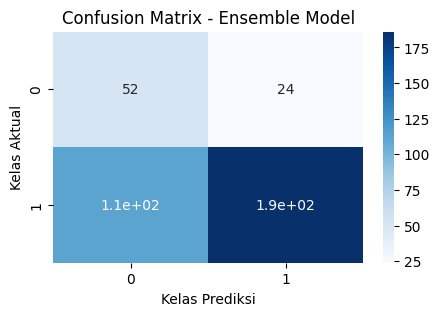

In [19]:
# Ensemble Model
scores = [knn_score, svm_score]
svm_knn =VotingClassifier(estimators=[('KNN', k_nn), ('SVM', svm)], voting='soft', weights = scores)
svm_knn = svm_knn.fit(X_over,y_over)
yPred=  svm_knn.predict(X_test)

# Evaluate ensemble predictions
print (accuracy_score(y_test, yPred))
print(classification_report(y_test, yPred))
print(confusion_matrix(y_test, yPred))

#confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()



In [229]:

# Define the number of folds for cross-validation
k = 10

# Initialize the k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the base learners
knn = KNeighborsClassifier(n_neighbors = 13)
svm = SVC(kernel='rbf', gamma= 10, probability = True)

# Initialize the ensemble classifier with soft voting
ensemble = VotingClassifier(estimators=[('knn', knn), ('svm', svm)], voting='soft')

# Perform k-fold cross-validation
fold_accuracies = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_over, X_test = X.iloc[train_index], X.iloc[test_index]
    y_over, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the ensemble classifier on the training data
    ensemble.fit(X_over, y_over)
    
    # Make predictions on the test data
    y_pred = ensemble.predict(X_test)
    
    # Calculate accuracy for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(fold_accuracy)
    
    # Print accuracy for the fold
    print("Fold {}: Accuracy: {:.2f}".format(fold, fold_accuracy))


# Calculate the average accuracy across all folds
average_accuracy = sum(fold_accuracies) / k

# Print the average accuracy
print("Average Accuracy: {:.2f}".format(average_accuracy))


print(classification_report(y_test, y_pred))

Fold 1: Accuracy: 0.76
Fold 2: Accuracy: 0.78
Fold 3: Accuracy: 0.73
Fold 4: Accuracy: 0.82
Fold 5: Accuracy: 0.85
Fold 6: Accuracy: 0.84
Fold 7: Accuracy: 0.81
Fold 8: Accuracy: 0.77
Fold 9: Accuracy: 0.82
Fold 10: Accuracy: 0.77
Average Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IWANG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,